#### Generating csv with selected users for a given collection 

In [161]:
#############
# Constants (From /Volumes/Untitled/seungwoong.ha/collmind/proj_utils_gpu.py")#
#############
from datetime import datetime

DATA_DIR = "/data/comments/valentin"

COLLECTION_NAMES = ["Atlantic", "Breitbart", "Gatewaypundit", "Motherjones", "Thehill"]

CORRECTED_DICT = {
    "Gatewaypundit": "0",
    "Breitbart": "1",
    "Thehill": "2",
    "Atlantic": "3",
    "Motherjones": "4",
}

CORRECTED_DICT_REVERSE = {
    "0": "Gatewaypundit",
    "1": "Breitbart",
    "2": "Thehill",
    "3": "Atlantic",
    "4": "Motherjones"
}

DATE_RANGES_OLD = {
    "Atlantic": (datetime(2012, 6, 1), datetime(2018, 5, 1)),
    "Breitbart": (datetime(2012, 6, 1), datetime(2021, 6, 1)),
    "Gatewaypundit": (datetime(2015, 1, 1), datetime(2021, 6, 1)),
    "Motherjones": (datetime(2012, 6, 1), datetime(2019, 9, 1)),
    "Thehill": (datetime(2012, 6, 1), datetime(2021, 6, 1))
    
}

DATE_RANGES = {
    "Atlantic": (datetime(2012, 6, 1), datetime(2018, 5, 1)),
    "Breitbart": (datetime(2012, 6, 1), datetime(2023, 4, 1)),
    "Gatewaypundit": (datetime(2015, 1, 1), datetime(2023, 4, 1)),
    "Motherjones": (datetime(2012, 6, 1), datetime(2019, 9, 1)),
    "Thehill": (datetime(2012, 6, 1), datetime(2022, 3, 1))
}

MODEL_NAMES = {
    "Atlantic": 'atlantic_new_s4_r19_h200_u80_t10',
    "Breitbart": 'breitbart_new_s3_r19_h225_u20_t10',
    "Gatewaypundit": 'gatewaypundit_new_s4_r19_h400_u30_t10',
    "Motherjones": 'motherjones_new_s5_r19_h425_u90_t10',
    "Thehill": 'thehill_new_s2_r19_h300_u80_t10',
    "global": 'global_new_s1_r19_h325_u20_t10',
    "title": 'title_new_s2_r19_h35_u50_t10'
}

NUM_TOPICS = {
    "Atlantic": 219,
    "Breitbart": 287,
    "Gatewaypundit": 251,
    "Motherjones": 120,
    "Thehill": 257
}  # excluding -1

In [129]:
import pyarrow.parquet as pq

# Read the schema of the Parquet file
parquet_file = pq.ParquetFile("/Volumes/T7 Shield/user_trajectory_df.parquet")

# Print the schema to inspect the columns and their data types
print(parquet_file.schema)


required group field_id=-1 schema {
  optional binary field_id=-1 user_id (String);
  optional group field_id=-1 comment_id (List) {
    repeated group field_id=-1 list {
      optional binary field_id=-1 item (String);
    }
  }
  optional group field_id=-1 article_id (List) {
    repeated group field_id=-1 list {
      optional binary field_id=-1 item (String);
    }
  }
  optional group field_id=-1 collection_id (List) {
    repeated group field_id=-1 list {
      optional int64 field_id=-1 item;
    }
  }
  optional group field_id=-1 createdAt (List) {
    repeated group field_id=-1 list {
      optional int64 field_id=-1 item (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
    }
  }
  optional int64 field_id=-1 num_comments;
  optional int64 field_id=-1 age;
}



In [130]:
import pyarrow.parquet as pq
import pandas as pd

parquet_file = pq.ParquetFile("/Volumes/T7 Shield/user_trajectory_df.parquet")

# Define a reasonable batch size based on your memory constraints
batch_size = 1000
all_dfs = []

for batch in parquet_file.iter_batches(batch_size=batch_size):
    df_batch = batch.to_pandas()
    # Either process each batch individually or collect them
    all_dfs.append(df_batch)

In [131]:
# Optionally combine all batches if you need the complete dataset
full_df = pd.concat(all_dfs, ignore_index=True)
full_df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0
...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0


In [159]:
full_df.head(50)

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0
5,51937073,"[737260753, 737267800, 737341656, 737342873, 7...","[975751523, 975751523, 975926975, 975926975, 9...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, ...","[2012-12-15T12:39:44.000000, 2012-12-15T12:48:...",1178,2527
6,32309650,"[1766737650, 2020997030, 2639437267, 279899726...","[3375712419, 3757195202, 4766529149, 500626223...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2015-01-01T00:45:42.000000, 2015-05-12T19:56:...",55,1036
7,121973074,"[1766747894, 1766748778, 1766751269, 176675183...","[3378186944, 3378186944, 3378148626, 337814862...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:58:39.000000, 2015-01-01T00:59:...",19,19
8,24825032,"[847134205, 923779608, 923783951, 923805953, 1...","[1173483724, 1369799811, 1369799811, 136979981...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2013-03-30T12:47:51.000000, 2013-06-09T01:01:...",460,3188
9,124660842,"[1646578525, 1705689015, 1706046654, 171030271...","[3138190384, 3247104432, 3247414802, 325862141...","[2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2014-10-21T16:20:43.000000, 2014-11-21T17:38:...",907,298


In [162]:
# keep only rows that have 3 inside the collection_id column 
collection_name = "Motherjones"
collection_id = int(CORRECTED_DICT[collection_name])
filtered_df = full_df[full_df['collection_id'].apply(lambda x: collection_id in x)]
filtered_df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703
5,51937073,"[737260753, 737267800, 737341656, 737342873, 7...","[975751523, 975751523, 975926975, 975926975, 9...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, ...","[2012-12-15T12:39:44.000000, 2012-12-15T12:48:...",1178,2527
14,40010924,"[841798765, 853566091, 857017277, 859429610, 8...","[1161875980, 1187178720, 1196697494, 120120687...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...","[2013-03-25T16:31:39.000000, 2013-04-05T22:56:...",11952,2824
16,36316488,"[871669888, 871673182, 871675634, 871675877, 8...","[1225391695, 1225391695, 1225391695, 122539169...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2013-04-22T01:02:38.000000, 2013-04-22T01:07:...",21758,3672
19,54635532,"[328700828, 522246083, 522247847, 666948162, 8...","[422761156, 679975393, 679975393, 864333042, 1...","[4, 2, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 2, 1, 2, ...","[2011-10-07T06:52:53.000000, 2012-05-08T01:43:...",99,4211
...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0


In [169]:
# Function to check if all lists in the specified columns are of the same length
def check_list_lengths(row):
    lengths = [len(row['collection_id']), len(row['comment_id']), len(row['article_id']), len(row['createdAt'])]
    return all(length == lengths[0] for length in lengths)

# fucntion to the row by the collection_id
def filter_by_collection_id(row, collection_id):

    collection_name = CORRECTED_DICT_REVERSE[str(collection_id)]
    # Get the mask of indices where the collection_id is equal to the specified value
    mask = [index for index, val in enumerate(row['collection_id']) if val == collection_id]
    
    # Filter each list in the row based on the mask
    row['collection_id'] = [row['collection_id'][i] for i in mask]
    row['comment_id'] = [row['comment_id'][i] for i in mask]
    row['article_id'] = [row['article_id'][i] for i in mask]
    row['createdAt'] = [row['createdAt'][i] for i in mask]

    # re-compute the num_comments (length of the list)
    row[f'num_comments_{collection_name}'] = len(row['comment_id'])

    # Re-compute the age in days
    created_at_series = pd.Series(row['createdAt'])
    max_date = created_at_series.max()
    min_date = created_at_series.min()
    age_timedelta =  max_date - min_date
    
    row[f'age_{collection_name}'] = age_timedelta.days  # keep only the days

    return row

In [170]:
sub_sample = filtered_df.head(10)
sub_sample.apply(filter_by_collection_id, axis=1, collection_id=collection_id) 

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones
3,46987845,[2109386276],[3891733638],[4],[2015-06-30T21:30:00.000000],29862,3703,1,0
5,51937073,[1318615033],[2585958447],[4],[2014-04-04T16:33:29.000000],1178,2527,1,0
14,40010924,"[1319948916, 1415800911, 1971969659, 197200392...","[2586056854, 2723459451, 3683189698, 368318969...","[4, 4, 4, 4, 4, 4, 4]","[2014-04-05T10:36:27.000000, 2014-06-02T10:11:...",11952,2824,7,378
16,36316488,"[893464838, 893469146, 893473746, 893479071, 8...","[1278917921, 1278917921, 1278917921, 127891792...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2013-05-11T23:37:13.000000, 2013-05-11T23:40:...",21758,3672,60,1633
19,54635532,"[328700828, 3702239997]","[422761156, 6404051605]","[4, 4]","[2011-10-07T06:52:53.000000, 2018-01-11T09:02:...",99,4211,2,2288
22,98392230,"[1538368203, 1538372892, 1538377271, 153838109...","[2917588172, 2917588172, 2917588172, 291758817...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2014-08-12T02:17:30.000000, 2014-08-12T02:22:...",10125,3204,54,651
23,26318615,[1377317078],[2672014577],[4],[2014-05-09T20:57:55.000000],81,3031,1,0
26,27844421,"[731391440, 862327002, 2650355334, 3797482960]","[415042957, 126573777, 4601354849, 6533722191]","[4, 4, 4, 4]","[2012-12-09T02:56:45.000000, 2013-04-13T18:52:...",1850,2889,4,1918
29,52820439,[1091227336],[1882168973],[4],[2013-10-21T20:05:26.000000],177,3141,1,0
31,45967332,[1845828532],[3501101516],[4],[2015-02-10T16:44:45.000000],61,2370,1,0


In [171]:
# it took 3 minutes! 
collection_name = "Motherjones"
collection_id = int(CORRECTED_DICT[collection_name])
motherjones_df = filtered_df.apply(filter_by_collection_id, axis=1, collection_id=collection_id) 
motherjones_df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones
3,46987845,[2109386276],[3891733638],[4],[2015-06-30T21:30:00.000000],29862,3703,1,0
5,51937073,[1318615033],[2585958447],[4],[2014-04-04T16:33:29.000000],1178,2527,1,0
14,40010924,"[1319948916, 1415800911, 1971969659, 197200392...","[2586056854, 2723459451, 3683189698, 368318969...","[4, 4, 4, 4, 4, 4, 4]","[2014-04-05T10:36:27.000000, 2014-06-02T10:11:...",11952,2824,7,378
16,36316488,"[893464838, 893469146, 893473746, 893479071, 8...","[1278917921, 1278917921, 1278917921, 127891792...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2013-05-11T23:37:13.000000, 2013-05-11T23:40:...",21758,3672,60,1633
19,54635532,"[328700828, 3702239997]","[422761156, 6404051605]","[4, 4]","[2011-10-07T06:52:53.000000, 2018-01-11T09:02:...",99,4211,2,2288
...,...,...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0,1,0
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0,1,0
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0,1,0
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0,1,0


In [173]:
df = motherjones_df.copy()
df.drop(columns='collection_id', inplace=True)
df

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones
3,46987845,[2109386276],[3891733638],[2015-06-30T21:30:00.000000],29862,3703,1,0
5,51937073,[1318615033],[2585958447],[2014-04-04T16:33:29.000000],1178,2527,1,0
14,40010924,"[1319948916, 1415800911, 1971969659, 197200392...","[2586056854, 2723459451, 3683189698, 368318969...","[2014-04-05T10:36:27.000000, 2014-06-02T10:11:...",11952,2824,7,378
16,36316488,"[893464838, 893469146, 893473746, 893479071, 8...","[1278917921, 1278917921, 1278917921, 127891792...","[2013-05-11T23:37:13.000000, 2013-05-11T23:40:...",21758,3672,60,1633
19,54635532,"[328700828, 3702239997]","[422761156, 6404051605]","[2011-10-07T06:52:53.000000, 2018-01-11T09:02:...",99,4211,2,2288
...,...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[2022-08-12T06:15:40.000000],1,0,1,0
1992538,380909193,[5710779204],[8989006764],[2022-01-27T21:08:27.000000],1,0,1,0
1992539,345270447,[5716815397],[8998684079],[2022-02-01T01:18:27.000000],1,0,1,0
1992540,381459559,[5730145969],[9013121563],[2022-02-11T13:52:03.000000],1,0,1,0


In [174]:
def check_and_clean_lengths(df: pd.DataFrame) -> pd.DataFrame:
    """
    Checks if each row has consistent lengths across specified fields and drops length columns.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data
        
    Returns:
        pd.DataFrame: Cleaned DataFrame with length columns removed
    """
    # Fields to check
    fields = ['comment_id', 'createdAt', 'article_id']
    
    # Create length columns efficiently using vectorized operations
    for field in fields:
        df[f'{field}_length'] = df[field].apply(len)
    
    # Check if each row has consistent lengths across fields
    length_columns = [f'{field}_length' for field in fields]
    inconsistent_rows = df[length_columns].nunique(axis=1) > 1
    
    if not inconsistent_rows.any():
        print("All rows have consistent lengths across fields")
    else:
        print(f"Warning: {inconsistent_rows.sum()} rows have inconsistent lengths across fields")
        # Print the first few rows with inconsistent lengths
        inconsistent_data = df[inconsistent_rows].head()
        for idx, row in inconsistent_data.iterrows():
            print(f"\nRow {idx} has different lengths:")
            for field in fields:
                print(f"{field}: {row[f'{field}_length']}")
    
    # Drop length columns
    df = df.drop(columns=length_columns)
    
    return df

check_and_clean_lengths(df)

All rows have consistent lengths across fields


,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones
3,46987845,[2109386276],[3891733638],[2015-06-30T21:30:00.000000],29862,3703,1,0
5,51937073,[1318615033],[2585958447],[2014-04-04T16:33:29.000000],1178,2527,1,0
14,40010924,"[1319948916, 1415800911, 1971969659, 197200392...","[2586056854, 2723459451, 3683189698, 368318969...","[2014-04-05T10:36:27.000000, 2014-06-02T10:11:...",11952,2824,7,378
16,36316488,"[893464838, 893469146, 893473746, 893479071, 8...","[1278917921, 1278917921, 1278917921, 127891792...","[2013-05-11T23:37:13.000000, 2013-05-11T23:40:...",21758,3672,60,1633
19,54635532,"[328700828, 3702239997]","[422761156, 6404051605]","[2011-10-07T06:52:53.000000, 2018-01-11T09:02:...",99,4211,2,2288
...,...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[2022-08-12T06:15:40.000000],1,0,1,0
1992538,380909193,[5710779204],[8989006764],[2022-01-27T21:08:27.000000],1,0,1,0
1992539,345270447,[5716815397],[8998684079],[2022-02-01T01:18:27.000000],1,0,1,0
1992540,381459559,[5730145969],[9013121563],[2022-02-11T13:52:03.000000],1,0,1,0


In [176]:
df[df['num_comments_Motherjones'] >= 1000]

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length
922,9673942,"[85259632, 85551104, 85613714, 86503888, 86504...","[151598753, 151598753, 126694755, 153025210, 1...","[2010-10-08T17:26:00.000000, 2010-10-09T19:49:...",5008,3176,1916,251,1916,1916,1916
2040,114431,"[101412736, 143595470, 277558671, 306336720, 3...","[174500945, 225647508, 376371216, 407340929, 4...","[2010-11-23T22:47:14.000000, 2011-02-09T20:46:...",13411,2823,5928,2675,5928,5928,5928
3813,669762,"[725011582, 725080239, 725106802, 725115441, 7...","[928251718, 935150272, 935150272, 935150272, 9...","[2012-12-01T19:56:49.000000, 2012-12-01T22:29:...",5718,3918,1089,587,1089,1089,1089
4311,6150544,"[66728677, 66728749, 66729063, 66729349, 66729...","[126683040, 126683108, 126683203, 126683331, 1...","[2010-01-01T02:55:05.000000, 2010-01-04T03:34:...",4856,3746,3619,1797,3619,3619,3619
4346,16092347,"[875430948, 875434849, 875536523, 875538848, 8...","[1231667734, 1231667734, 1231667734, 123166773...","[2013-04-25T14:40:03.000000, 2013-04-25T14:44:...",8181,4113,1483,698,1483,1483,1483
...,...,...,...,...,...,...,...,...,...,...,...
1954221,286535467,"[3877114141, 3877297777, 3973013486, 397310200...","[6638626718, 6638626718, 6771247409, 677124740...","[2018-04-28T19:02:18.000000, 2018-04-28T21:49:...",1772,430,1772,430,1772,1772,1772
1955696,267398953,"[4069779510, 4069788434, 4069791674, 406979502...","[5257144727, 6883656767, 6883656767, 688365676...","[2018-08-31T05:15:17.000000, 2018-08-31T05:25:...",1068,18,1068,18,1068,1068,1068
1956547,21262254,"[413040045, 584352287, 584364395, 584412237, 5...","[534363231, 754019001, 756777233, 759097164, 7...","[2012-01-17T01:54:54.000000, 2012-07-11T17:01:...",3014,484,3014,484,3014,3014,3014
1962802,24196926,"[481015223, 481242747, 486164366, 492259487, 4...","[630219123, 630219123, 635584654, 641392471, 6...","[2012-03-30T18:00:42.000000, 2012-03-30T21:53:...",1321,225,1321,225,1321,1321,1321


In [177]:
sub_sample = df[(df['num_comments_Motherjones'] > 1000) & (df['age_Motherjones'] >= 365)].copy()
sub_sample

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length
2040,114431,"[101412736, 143595470, 277558671, 306336720, 3...","[174500945, 225647508, 376371216, 407340929, 4...","[2010-11-23T22:47:14.000000, 2011-02-09T20:46:...",13411,2823,5928,2675,5928,5928,5928
3813,669762,"[725011582, 725080239, 725106802, 725115441, 7...","[928251718, 935150272, 935150272, 935150272, 9...","[2012-12-01T19:56:49.000000, 2012-12-01T22:29:...",5718,3918,1089,587,1089,1089,1089
4311,6150544,"[66728677, 66728749, 66729063, 66729349, 66729...","[126683040, 126683108, 126683203, 126683331, 1...","[2010-01-01T02:55:05.000000, 2010-01-04T03:34:...",4856,3746,3619,1797,3619,3619,3619
4346,16092347,"[875430948, 875434849, 875536523, 875538848, 8...","[1231667734, 1231667734, 1231667734, 123166773...","[2013-04-25T14:40:03.000000, 2013-04-25T14:44:...",8181,4113,1483,698,1483,1483,1483
6393,94647243,"[1242220511, 1242254704, 1242256197, 124276681...","[2258575574, 2258575574, 2258575574, 226155053...","[2014-02-13T04:14:39.000000, 2014-02-13T05:05:...",3160,1958,3132,1958,3132,3132,3132
...,...,...,...,...,...,...,...,...,...,...,...
1952841,278554039,"[3732103810, 3735932413, 3747676468, 375876056...","[6443542562, 6450218368, 6461777012, 648030249...","[2018-01-29T18:03:18.000000, 2018-01-31T19:33:...",1780,561,1780,561,1780,1780,1780
1953157,280511556,"[3765227382, 3765254606, 3765256299, 376526161...","[6483758125, 6481656366, 6481656366, 648375812...","[2018-02-19T03:08:04.000000, 2018-02-19T03:40:...",1590,536,1590,536,1590,1590,1590
1953665,283589217,"[3821471317, 3821474258, 3821480519, 382153406...","[6573006630, 6573006630, 6573006630, 657300663...","[2018-03-24T03:40:04.000000, 2018-03-24T03:43:...",9095,507,9095,507,9095,9095,9095
1954221,286535467,"[3877114141, 3877297777, 3973013486, 397310200...","[6638626718, 6638626718, 6771247409, 677124740...","[2018-04-28T19:02:18.000000, 2018-04-28T21:49:...",1772,430,1772,430,1772,1772,1772


In [179]:
# 1.2 Selct longest active users and with at least 100 comments 
percentile_95_time = df["age_Motherjones"].quantile(0.95)
df_top5_time = df[df["age_Motherjones"] >= percentile_95_time]
sub_sample_df = df_top5_time[df_top5_time['num_comments_Motherjones'] >= 1000]

sub_sample_ids = sub_sample_df['user_id'].tolist()
print(f"Computed sub sample ids. Users are {len(sub_sample_ids)}")


Computed sub sample ids. Users are 455


In [180]:
top_old_users = sub_sample_df.copy()

In [182]:

# Function to calculate monthly comment statistics
def calculate_monthly_stats(row):
    # Sort the 'createdAt' dates
    sorted_dates = sorted(row['createdAt'])
    
    # Convert to year-month format
    year_month = pd.to_datetime(sorted_dates).to_period('M')
    
    # Count comments per month
    monthly_counts = year_month.value_counts().sort_index()
    
    # Create a complete range of months from the first to the last comment
    all_months = pd.period_range(start=year_month.min(), end=year_month.max(), freq='M')
    
    # Reindex the monthly counts to include all months, filling missing months with 0
    monthly_counts = monthly_counts.reindex(all_months, fill_value=0)
    
    # Calculate mean and std of monthly comments
    mean_comments = monthly_counts.mean()
    std_comments = monthly_counts.std()
    
    # Count the number of active months
    active_months = len(monthly_counts)
    
    row['mean_comments_per_month'] = mean_comments
    row['std_comments_per_month'] = std_comments
    row['months_counted'] = active_months
    
    return row

In [183]:
from tqdm import tqdm
tqdm.pandas(desc="Processing Users")
sub_sample = sub_sample.progress_apply(calculate_monthly_stats, axis=1)


Processing Users: 100%|██████████| 614/614 [00:02<00:00, 263.22it/s]


In [184]:
sub_sample

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length,mean_comments_per_month,std_comments_per_month,months_counted
2040,114431,"[101412736, 143595470, 277558671, 306336720, 3...","[174500945, 225647508, 376371216, 407340929, 4...","[2010-11-23T22:47:14.000000, 2011-02-09T20:46:...",13411,2823,5928,2675,5928,5928,5928,66.606742,127.252042,89
3813,669762,"[725011582, 725080239, 725106802, 725115441, 7...","[928251718, 935150272, 935150272, 935150272, 9...","[2012-12-01T19:56:49.000000, 2012-12-01T22:29:...",5718,3918,1089,587,1089,1089,1089,54.450000,46.887856,20
4311,6150544,"[66728677, 66728749, 66729063, 66729349, 66729...","[126683040, 126683108, 126683203, 126683331, 1...","[2010-01-01T02:55:05.000000, 2010-01-04T03:34:...",4856,3746,3619,1797,3619,3619,3619,60.316667,55.752325,60
4346,16092347,"[875430948, 875434849, 875536523, 875538848, 8...","[1231667734, 1231667734, 1231667734, 123166773...","[2013-04-25T14:40:03.000000, 2013-04-25T14:44:...",8181,4113,1483,698,1483,1483,1483,61.791667,74.652807,24
6393,94647243,"[1242220511, 1242254704, 1242256197, 124276681...","[2258575574, 2258575574, 2258575574, 226155053...","[2014-02-13T04:14:39.000000, 2014-02-13T05:05:...",3160,1958,3132,1958,3132,3132,3132,48.184615,76.758325,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952841,278554039,"[3732103810, 3735932413, 3747676468, 375876056...","[6443542562, 6450218368, 6461777012, 648030249...","[2018-01-29T18:03:18.000000, 2018-01-31T19:33:...",1780,561,1780,561,1780,1780,1780,89.000000,54.689554,20
1953157,280511556,"[3765227382, 3765254606, 3765256299, 376526161...","[6483758125, 6481656366, 6481656366, 648375812...","[2018-02-19T03:08:04.000000, 2018-02-19T03:40:...",1590,536,1590,536,1590,1590,1590,83.684211,69.688236,19
1953665,283589217,"[3821471317, 3821474258, 3821480519, 382153406...","[6573006630, 6573006630, 6573006630, 657300663...","[2018-03-24T03:40:04.000000, 2018-03-24T03:43:...",9095,507,9095,507,9095,9095,9095,505.277778,220.672716,18
1954221,286535467,"[3877114141, 3877297777, 3973013486, 397310200...","[6638626718, 6638626718, 6771247409, 677124740...","[2018-04-28T19:02:18.000000, 2018-04-28T21:49:...",1772,430,1772,430,1772,1772,1772,110.750000,137.495939,16


In [185]:
sub_sample['cv_comments_per_month'] = (
        sub_sample['std_comments_per_month'] / sub_sample['mean_comments_per_month']
    )
sub_sample

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length,mean_comments_per_month,std_comments_per_month,months_counted,cv_comments_per_month
2040,114431,"[101412736, 143595470, 277558671, 306336720, 3...","[174500945, 225647508, 376371216, 407340929, 4...","[2010-11-23T22:47:14.000000, 2011-02-09T20:46:...",13411,2823,5928,2675,5928,5928,5928,66.606742,127.252042,89,1.910498
3813,669762,"[725011582, 725080239, 725106802, 725115441, 7...","[928251718, 935150272, 935150272, 935150272, 9...","[2012-12-01T19:56:49.000000, 2012-12-01T22:29:...",5718,3918,1089,587,1089,1089,1089,54.450000,46.887856,20,0.861118
4311,6150544,"[66728677, 66728749, 66729063, 66729349, 66729...","[126683040, 126683108, 126683203, 126683331, 1...","[2010-01-01T02:55:05.000000, 2010-01-04T03:34:...",4856,3746,3619,1797,3619,3619,3619,60.316667,55.752325,60,0.924327
4346,16092347,"[875430948, 875434849, 875536523, 875538848, 8...","[1231667734, 1231667734, 1231667734, 123166773...","[2013-04-25T14:40:03.000000, 2013-04-25T14:44:...",8181,4113,1483,698,1483,1483,1483,61.791667,74.652807,24,1.208137
6393,94647243,"[1242220511, 1242254704, 1242256197, 124276681...","[2258575574, 2258575574, 2258575574, 226155053...","[2014-02-13T04:14:39.000000, 2014-02-13T05:05:...",3160,1958,3132,1958,3132,3132,3132,48.184615,76.758325,65,1.593005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952841,278554039,"[3732103810, 3735932413, 3747676468, 375876056...","[6443542562, 6450218368, 6461777012, 648030249...","[2018-01-29T18:03:18.000000, 2018-01-31T19:33:...",1780,561,1780,561,1780,1780,1780,89.000000,54.689554,20,0.614489
1953157,280511556,"[3765227382, 3765254606, 3765256299, 376526161...","[6483758125, 6481656366, 6481656366, 648375812...","[2018-02-19T03:08:04.000000, 2018-02-19T03:40:...",1590,536,1590,536,1590,1590,1590,83.684211,69.688236,19,0.832753
1953665,283589217,"[3821471317, 3821474258, 3821480519, 382153406...","[6573006630, 6573006630, 6573006630, 657300663...","[2018-03-24T03:40:04.000000, 2018-03-24T03:43:...",9095,507,9095,507,9095,9095,9095,505.277778,220.672716,18,0.436735
1954221,286535467,"[3877114141, 3877297777, 3973013486, 397310200...","[6638626718, 6638626718, 6771247409, 677124740...","[2018-04-28T19:02:18.000000, 2018-04-28T21:49:...",1772,430,1772,430,1772,1772,1772,110.750000,137.495939,16,1.241498


In [158]:
sub_sample.sort_values(by='cv_comments_per_month', ascending=True).head(10)

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length,mean_comments_per_month,std_comments_per_month,months_counted,cv_comments_per_month
420807,37386588,"[719787272, 719795168, 719796614, 720639694, 7...","[945273586, 944878360, 944878360, 946849456, 9...","[2012-11-27T00:26:18.000000, 2012-11-27T00:41:...",1847,883,1844,883,1844,1844,1844,61.466667,20.143850,30,0.327720
754656,239181551,"[3105839671, 3107719066, 3107730469, 310773823...","[5471439454, 5475434979, 5474248859, 547543497...","[2017-01-18T14:04:22.000000, 2017-01-19T12:43:...",13914,1867,6189,389,6189,6189,6189,442.071429,149.375348,14,0.337899
1686872,199536272,"[2556258911, 2556296888, 2556309207, 255632655...","[4641479276, 4641479276, 4641479276, 464147927...","[2016-03-07T17:02:34.000000, 2016-03-07T17:24:...",9835,701,9835,701,9835,9835,9835,409.791667,149.506137,24,0.364834
1553366,3318757,"[56335467, 56337116, 56578598, 56685614, 57906...","[106641791, 106641791, 106641791, 107652224, 1...","[2010-06-12T03:32:56.000000, 2010-06-12T03:55:...",1114,838,1114,838,1114,1114,1114,39.785714,15.149519,28,0.380778
1667279,40009685,"[2244574111, 2248202405, 2248214841, 224904309...","[4112832676, 4119508648, 4119508648, 411950864...","[2015-09-09T16:25:05.000000, 2015-09-11T15:22:...",5594,881,5594,881,5594,5594,5594,186.466667,75.505530,30,0.404928
90614,234592611,"[3048295423, 3048633270, 3048685478, 304869291...","[5364547079, 5374879711, 5374879711, 537487971...","[2016-12-12T14:35:42.000000, 2016-12-12T18:07:...",19136,2008,8327,425,8327,8327,8327,555.133333,225.691910,15,0.406554
52295,147233829,"[1896619363, 1896625398, 1896626721, 189663225...","[3579896704, 3579896704, 3579896704, 357989670...","[2015-03-09T13:58:37.000000, 2015-03-09T14:02:...",61263,1712,26133,690,26133,26133,26133,1136.217391,463.505120,23,0.407937
1553452,21166113,"[410287508, 410290372, 410292066, 410301992, 4...","[537870817, 537870817, 537870817, 537535121, 5...","[2012-01-14T02:00:47.000000, 2012-01-14T02:06:...",12048,2215,12047,2215,12047,12047,12047,162.797297,68.243516,74,0.419193
427713,123045080,"[1623513703, 1623616771, 1623642712, 162371896...","[3091977225, 3091977225, 3091977225, 309197722...","[2014-10-07T14:26:01.000000, 2014-10-07T15:33:...",13987,1396,13545,1219,13545,13545,13545,330.365854,144.410311,41,0.437122
1298563,173145548,"[2332019832, 2332027939, 2332032026, 234874535...","[4267825990, 4267825990, 4267825990, 430032812...","[2015-10-28T22:18:16.000000, 2015-10-28T22:23:...",4834,641,4734,410,4734,4734,4734,315.600000,139.531768,15,0.442116


In [187]:
sub_sample.sort_values(by='cv_comments_per_month', ascending=True).head(1000)

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length,mean_comments_per_month,std_comments_per_month,months_counted,cv_comments_per_month
753384,183440977,"[2368230605, 2368323590, 2368335090, 236834458...","[4332508343, 4332508343, 4333281087, 433328108...","[2015-11-19T15:08:14.000000, 2015-11-19T16:05:...",102196,1442,100379,1365,100379,100379,100379,2182.152174,436.125770,46,0.199860
1923760,11733691,"[216075299, 216324161, 216326637, 216328995, 2...","[317787462, 317787462, 317787462, 317787462, 3...","[2011-06-02T01:02:00.000000, 2011-06-02T06:07:...",4938,778,4938,778,4938,4938,4938,189.923077,62.667965,26,0.329965
1428025,198961415,"[2548429049, 2548430410, 2548438305, 254844545...","[4628545419, 4628545419, 4628545419, 462813191...","[2016-03-02T23:49:51.000000, 2016-03-02T23:50:...",18037,1337,18025,1258,18025,18025,18025,429.166667,150.841043,42,0.351474
134382,291929094,"[3983582463, 3983607810, 3983946281, 398428501...","[6786144598, 6785765860, 6786365846, 678640626...","[2018-07-11T12:26:55.000000, 2018-07-11T12:47:...",5219,628,4622,398,4622,4622,4622,330.142857,118.391045,14,0.358606
1947055,183456236,"[3161524841, 3161808756, 3161810079, 316181227...","[5561471174, 5561937003, 5561937003, 556193700...","[2017-02-18T01:07:52.000000, 2017-02-18T06:37:...",7617,906,7617,906,7617,7617,7617,245.709677,99.310017,31,0.404176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495958,2022346,"[167008553, 169301759, 169303017, 169375795, 1...","[256022085, 259829559, 259829559, 259829559, 2...","[2011-03-17T04:29:00.000000, 2011-03-22T01:12:...",2924,2562,1140,2140,1140,1140,1140,16.056338,72.174568,71,4.495083
1350821,24374882,"[484907346, 484935762, 1199513984, 2601410271,...","[635141774, 635141774, 2118451205, 4708925575,...","[2012-04-03T20:17:30.000000, 2012-04-03T20:50:...",1177,2597,1174,2597,1174,1174,1174,13.651163,61.679202,86,4.518238
710796,5478042,"[263521369, 263522839, 263549624, 263550957, 2...","[366428116, 366428116, 363947459, 363947459, 3...","[2011-07-25T16:04:43.000000, 2011-07-25T16:07:...",1650,2522,1218,2514,1218,1218,1218,14.500000,66.320053,84,4.573797
469568,16831737,"[312068242, 640742932, 642200569, 642258533, 6...","[135441134, 830974794, 832684911, 832684911, 8...","[2011-09-15T20:53:17.000000, 2012-09-05T19:16:...",1100,1622,1094,1622,1094,1094,1094,20.259259,95.964456,54,4.736820


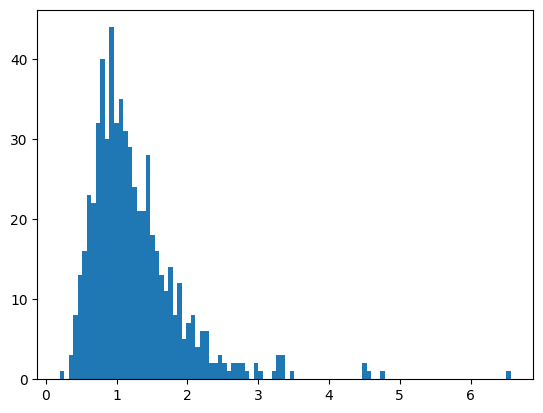

In [188]:
# plot the distribution of the cv_comments_per_month
from matplotlib import pyplot as plt
plt.hist(sub_sample['cv_comments_per_month'], bins=100)
plt.show()


In [190]:
# select only users within 2 and 3 quantile of the cv_comments_per_month
sub_sample = sub_sample[sub_sample['cv_comments_per_month'].between(sub_sample['cv_comments_per_month'].quantile(0.25), sub_sample['cv_comments_per_month'].quantile(0.75))]
sub_sample

,user_id,comment_id,article_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones,comment_id_length,createdAt_length,article_id_length,mean_comments_per_month,std_comments_per_month,months_counted,cv_comments_per_month
3813,669762,"[725011582, 725080239, 725106802, 725115441, 7...","[928251718, 935150272, 935150272, 935150272, 9...","[2012-12-01T19:56:49.000000, 2012-12-01T22:29:...",5718,3918,1089,587,1089,1089,1089,54.450000,46.887856,20,0.861118
4311,6150544,"[66728677, 66728749, 66729063, 66729349, 66729...","[126683040, 126683108, 126683203, 126683331, 1...","[2010-01-01T02:55:05.000000, 2010-01-04T03:34:...",4856,3746,3619,1797,3619,3619,3619,60.316667,55.752325,60,0.924327
4346,16092347,"[875430948, 875434849, 875536523, 875538848, 8...","[1231667734, 1231667734, 1231667734, 123166773...","[2013-04-25T14:40:03.000000, 2013-04-25T14:44:...",8181,4113,1483,698,1483,1483,1483,61.791667,74.652807,24,1.208137
12694,56799154,"[937605795, 938684311, 938691244, 938696772, 9...","[1415569359, 1415569359, 1415569359, 141556935...","[2013-06-21T14:02:46.000000, 2013-06-22T17:56:...",9294,2704,4750,675,4750,4750,4750,206.521739,201.931102,23,0.977772
13433,27429326,"[774299619, 840711609, 840718494, 840720238, 8...","[1033538757, 1150255301, 1150255301, 115025530...","[2013-01-21T22:23:24.000000, 2013-03-24T14:40:...",25573,3809,1208,544,1208,1208,1208,63.578947,73.466028,19,1.155509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944821,227408713,"[3005330248, 3016659298, 3019664965, 303971633...","[5308862744, 5326654312, 5328800146, 535794545...","[2016-11-16T18:27:53.000000, 2016-11-23T15:44:...",1510,995,1510,995,1510,1510,1510,44.411765,61.881665,34,1.393362
1946378,239926341,"[3118100368, 3132742626, 3132794329, 313327429...","[5490428221, 5512927721, 5512927721, 551407842...","[2017-01-24T21:42:18.000000, 2017-02-01T20:36:...",2565,930,2565,930,2565,2565,2565,80.156250,107.597251,32,1.342344
1947084,242670751,"[3163176114, 3179499818, 3179546399, 317955017...","[5558368377, 5579213797, 5579213797, 557921379...","[2017-02-19T02:40:59.000000, 2017-02-28T18:53:...",1044,899,1044,899,1044,1044,1044,33.677419,28.704688,31,0.852342
1954221,286535467,"[3877114141, 3877297777, 3973013486, 397310200...","[6638626718, 6638626718, 6771247409, 677124740...","[2018-04-28T19:02:18.000000, 2018-04-28T21:49:...",1772,430,1772,430,1772,1772,1772,110.750000,137.495939,16,1.241498


In [191]:

# save top 1k users 

output_path = "/Users/barolo/Desktop/PhD/Code/Comments_Beliefs/Batch_calling/data/selected_users/motherjones.csv"


sub_sample.sort_values(by='cv_comments_per_month', ascending=True).head(1000)["user_id"].to_csv(output_path, index=False)



In [135]:
longest_active_users = pd.read_csv("/Users/barolo/Desktop/PhD/Code/Comments_Beliefs/selected_users/motherjones_longest_active_users.csv")
longest_active_users

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age,num_comments_Motherjones,age_Motherjones
0,36316488,"['890113275', '890116470', '890117408', '89268...","['1270210643', '1270210643', '1270210643', '12...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2013-05-08T22:53:11.000000'), ...",21758,3672,148,1713
1,30204007,"['643680515', '643681055', '643681863', '93492...","['821899250', '821899250', '821899250', '14109...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2012-09-07T22:06:02.000000'), ...",1991,3923,312,1959
2,24419220,"['545971795', '569053573', '614453908', '65983...","['709803868', '741517009', '789930633', '85248...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2012-06-02T22:32:24.000000'), ...",11158,4013,175,1999
3,17601626,"['360182846', '360864575', '387765463', '38932...","['466758712', '467547282', '505526945', '50806...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2011-11-10T17:48:01.000000'), ...",7928,3169,224,1260
4,6172172,"['137231851', '140613133', '282198196', '28220...","['215520142', '221725692', '381172630', '38149...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2011-01-30T15:48:19.000000'), ...",827,4026,108,2563
...,...,...,...,...,...,...,...,...,...
3810,39851504,"['750480023', '3157258373', '3159796814', '315...","['995666061', '5553846599', '5557463979', '555...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2012-12-29T11:45:29.000000'), ...",395,1865,395,1865
3811,3745567,"['344040067', '644573640', '714463185', '71447...","['452427397', '833582334', '935266256', '93526...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2011-10-25T19:38:42.000000'), ...",180,2289,157,2289
3812,20296533,"['389185537', '415587195', '415594949', '41667...","['506733396', '545447168', '545447168', '54544...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2011-12-18T13:20:58.000000'), ...",558,2242,558,2242
3813,33178489,"['36816176', '36817668', '36821613', '66517140...","['70259489', '70259603', '70259930', '86198301...","[np.int64(3), np.int64(3), np.int64(3), np.int...","[np.datetime64('2010-02-08T17:36:38.000000'), ...",112,1249,112,1249
